# 数据合适 截止到10dB 图形最好

2023-05-24 22:21:25.251118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -10.0|  8.372e-01|  3.783e-01|           24792|     7.513e-01|     2.941e-01|              19277|   7.591e-01|   3.663e-01|            24009|      4.680e+02|
|--------------------------------------------------------------------------------------------------------------------------------------------

/Users/im/Documents/GitHub/sionna/Jupyter Notebooks/UncodedSystemFlatFading.py:281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


  7.315e-01|  2.969e-01|           19456|     6.222e-01|     2.154e-01|              14119|   6.215e-01|   2.194e-01|            14379|      4.678e+02|
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  5.511e-01|  1.956e-01|           12817|     4.381e-01|     1.370e-01|               8979|   3.998e-01|   1.260e-01|             8258|      4.808e+02|
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         5.0|  3.100e-01|  1.004e-01|            6578|     2.410e-01|     7.024e-02|               4603|   1.880e-01|   5.565e-02|             3647|      4.605e+02|
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|        10.0|  1.

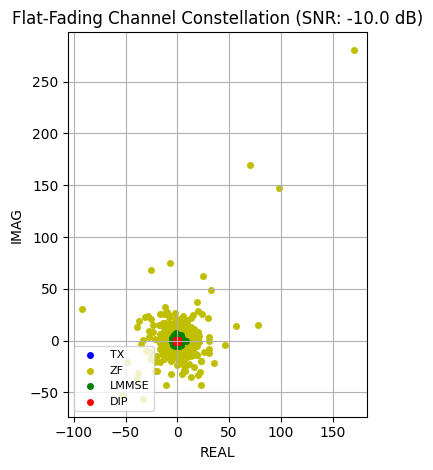

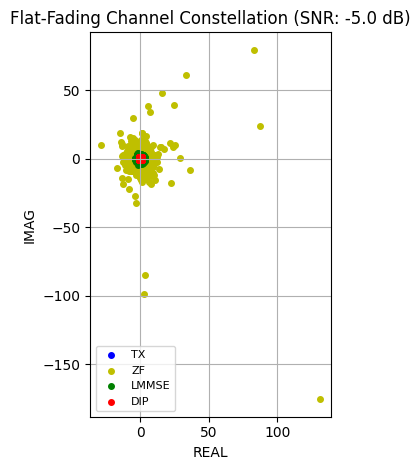

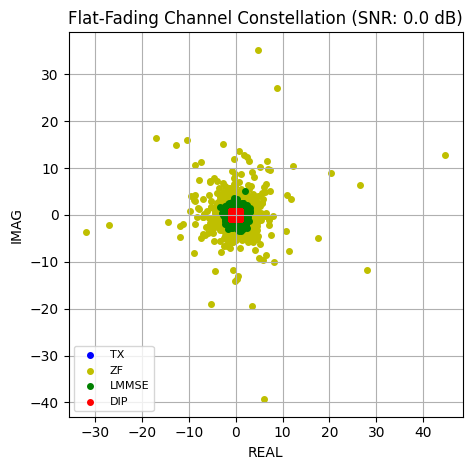

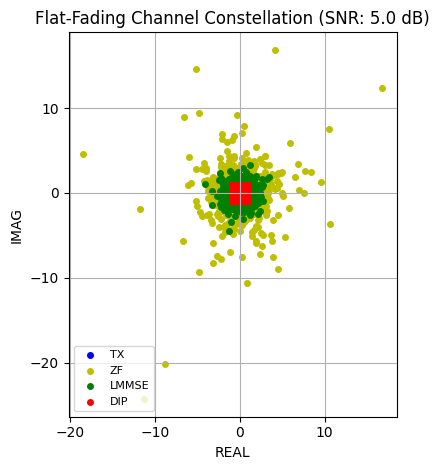

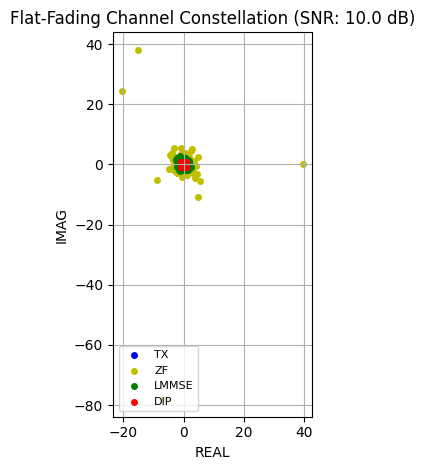

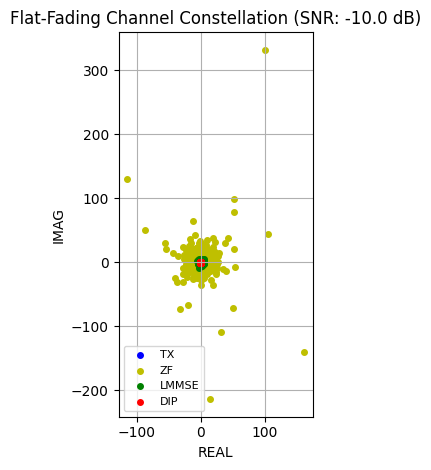

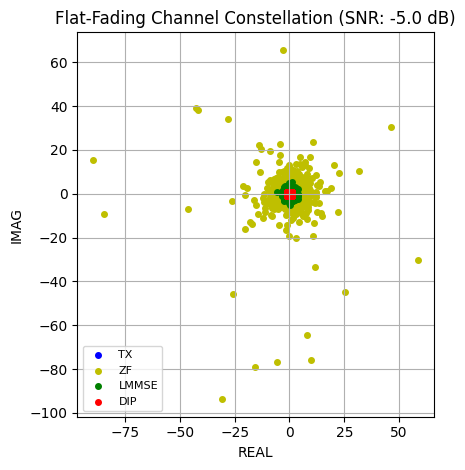

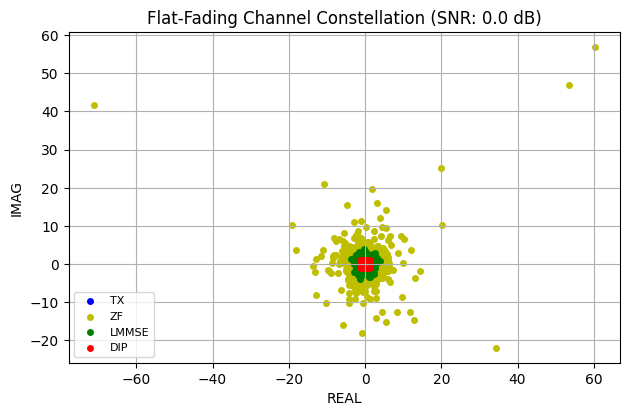

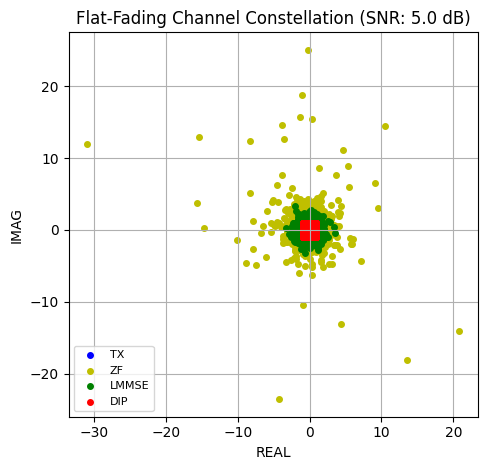

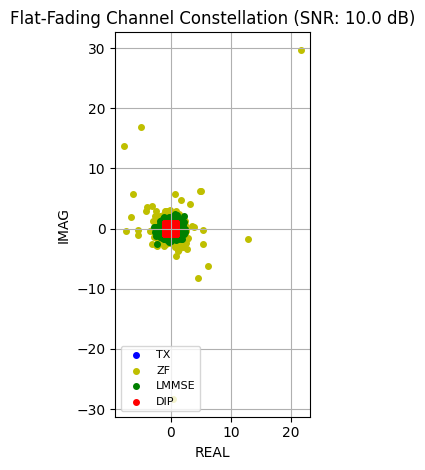

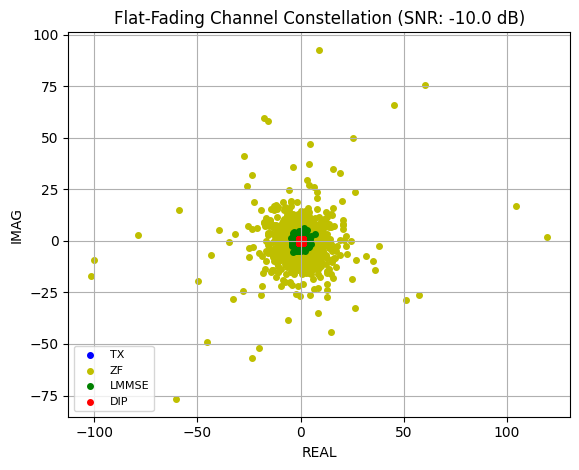

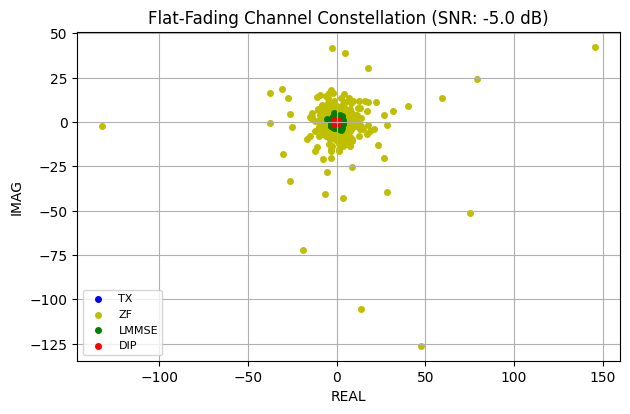

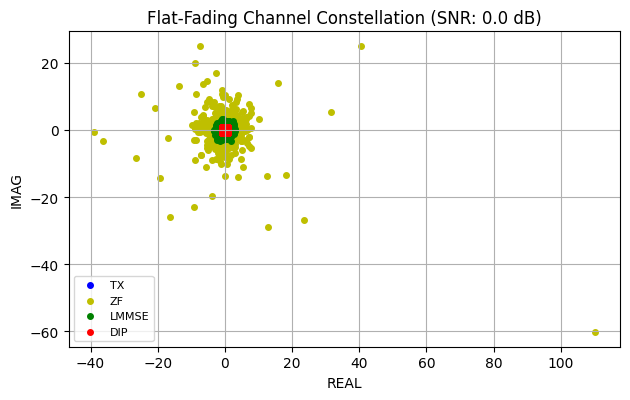

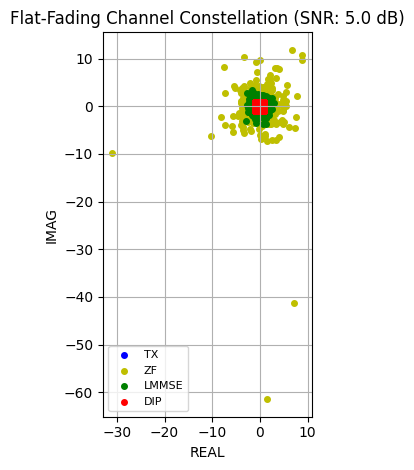

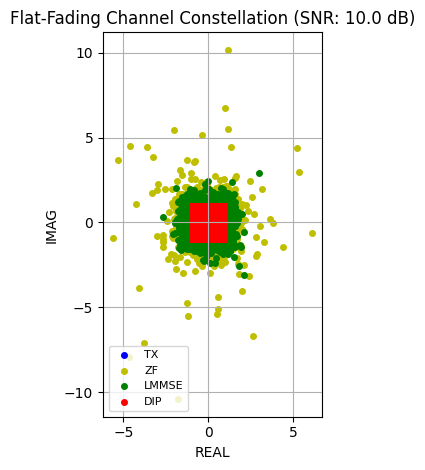

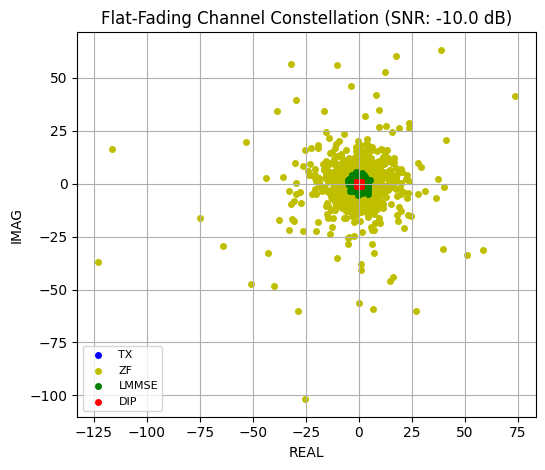

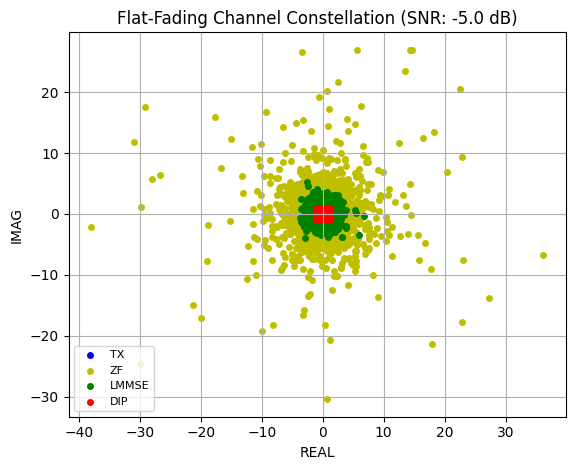

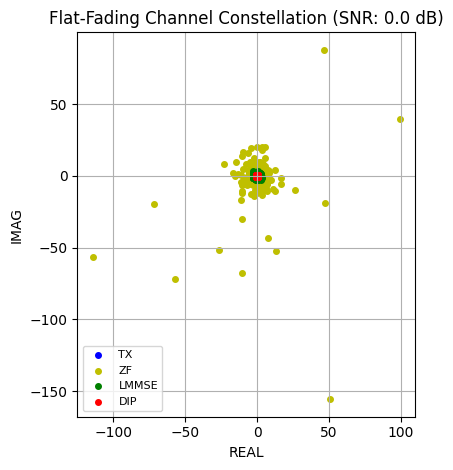

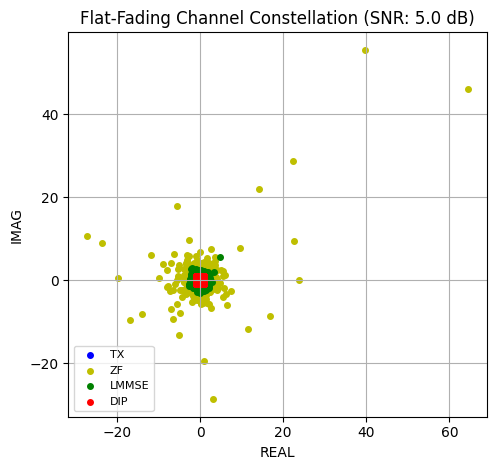

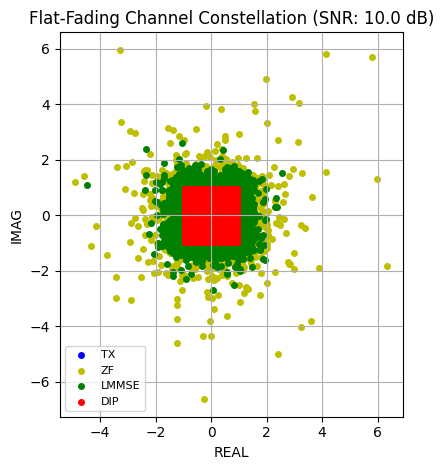

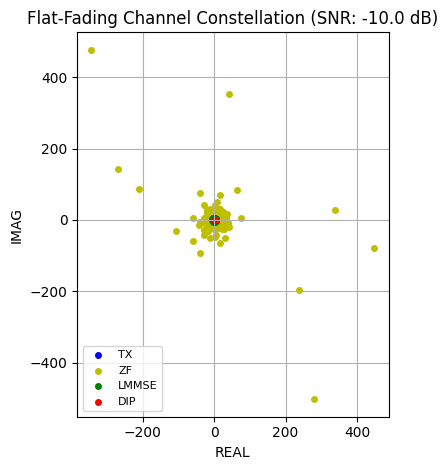

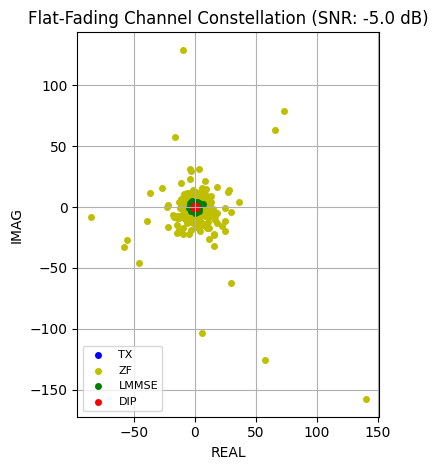

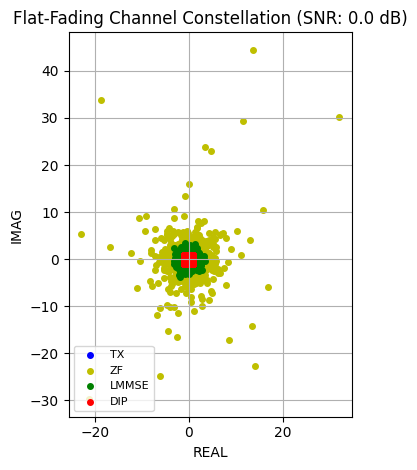

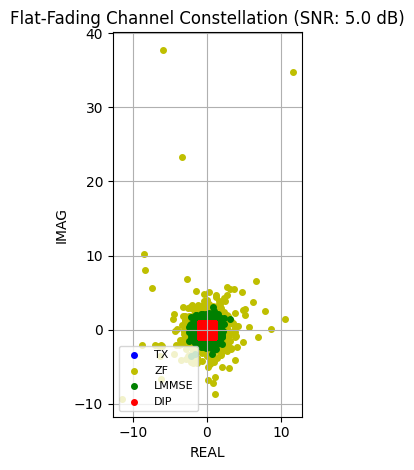

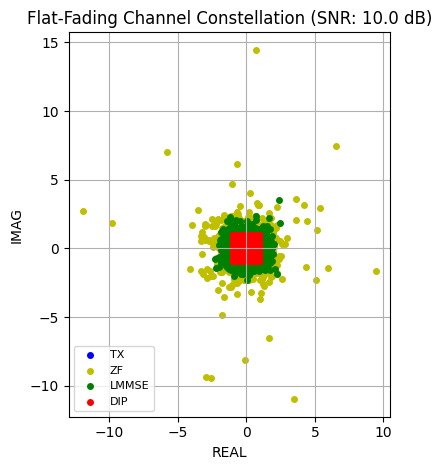

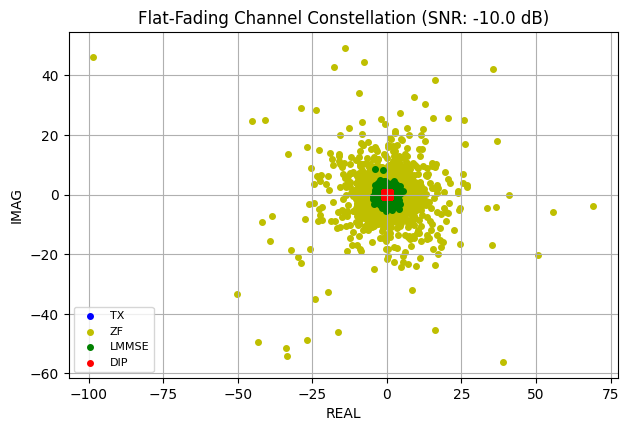

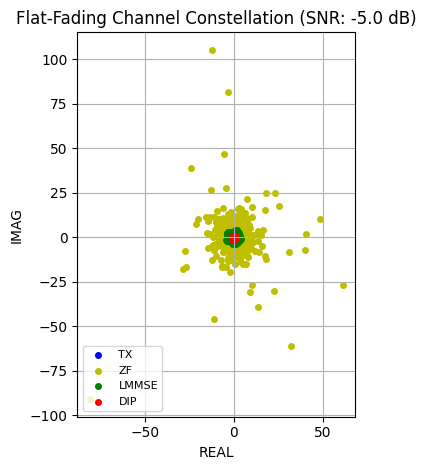

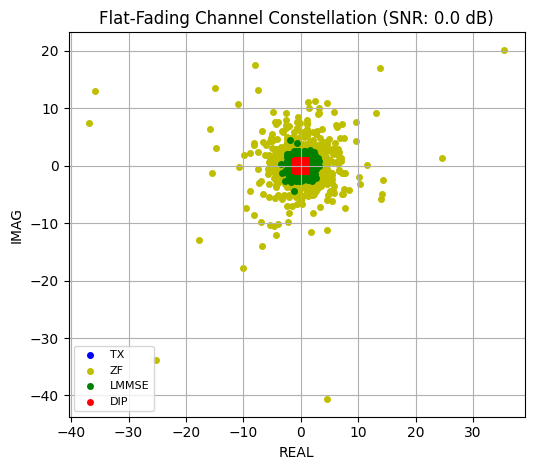

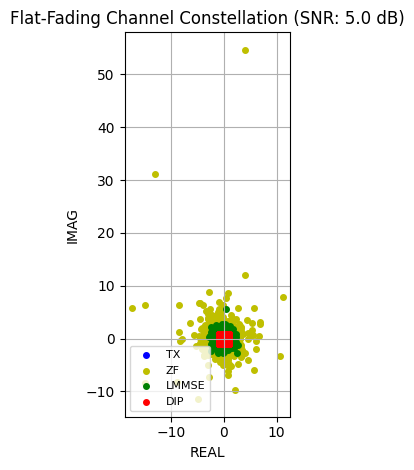

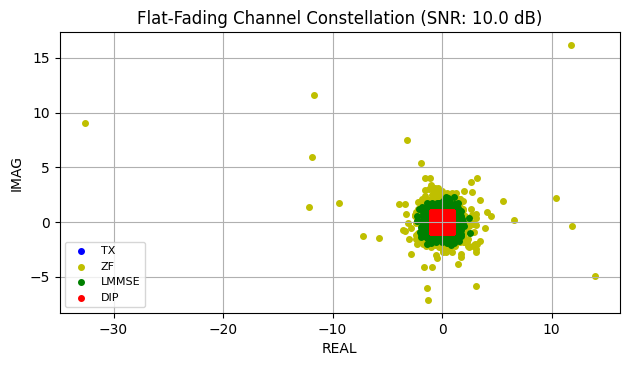

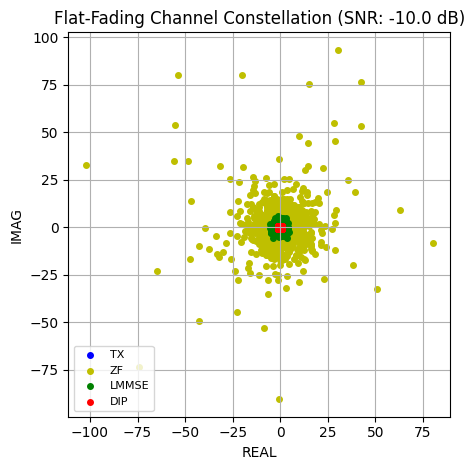

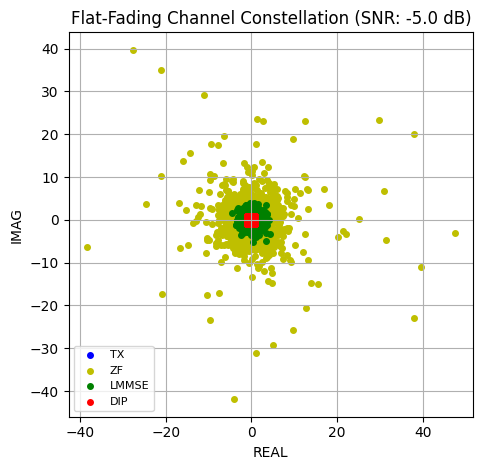

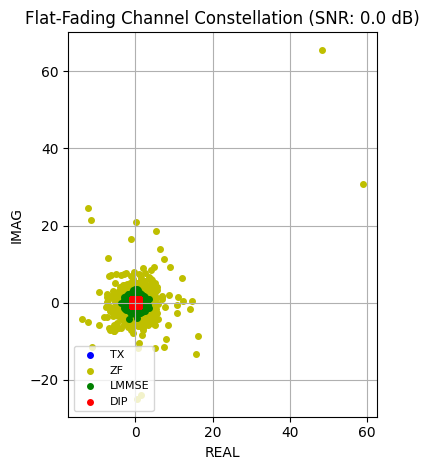

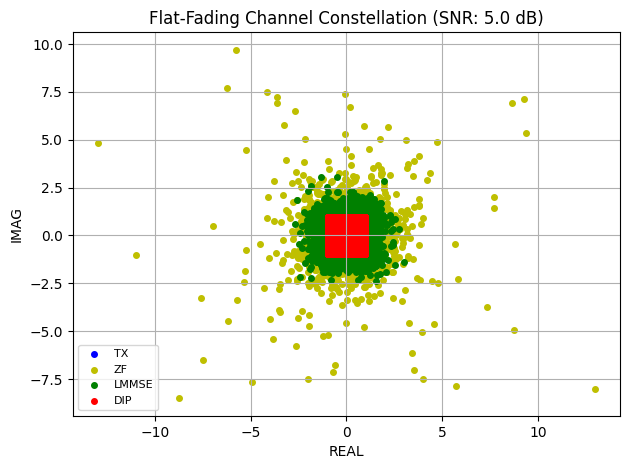

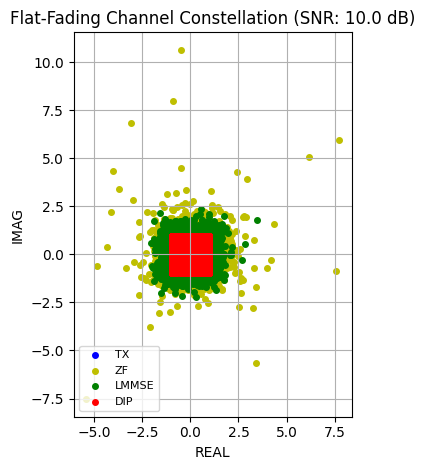

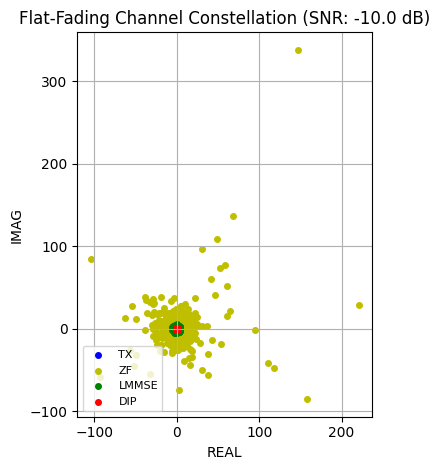

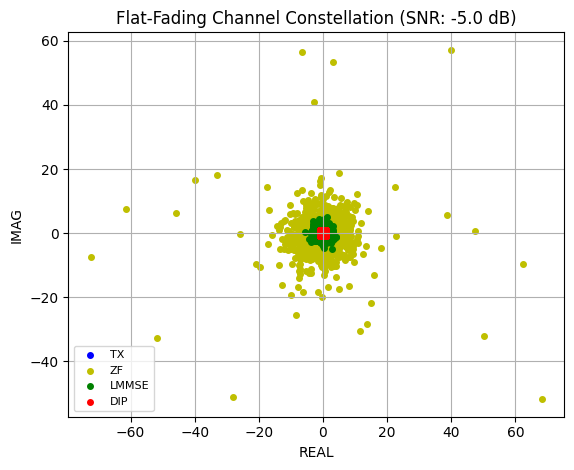

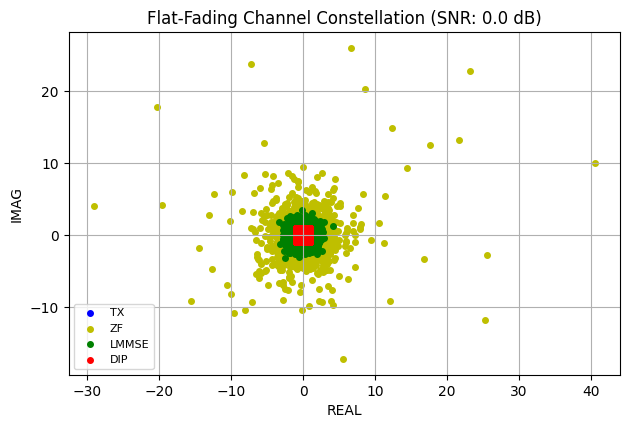

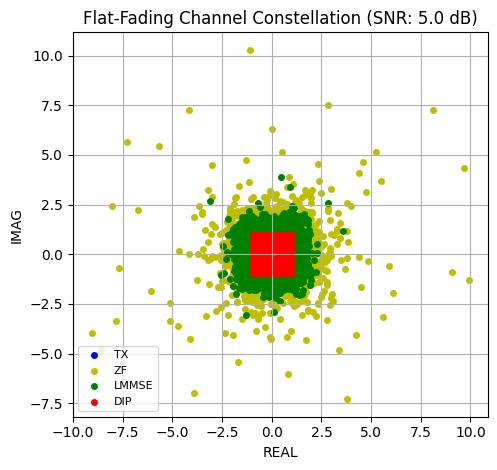

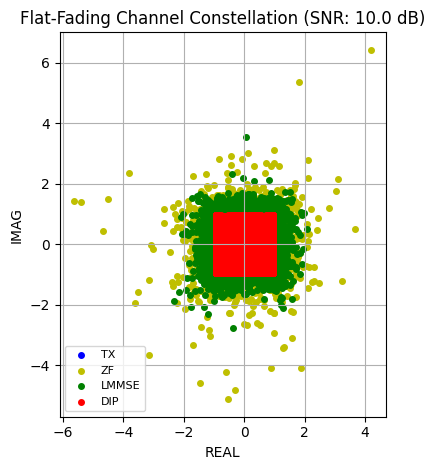

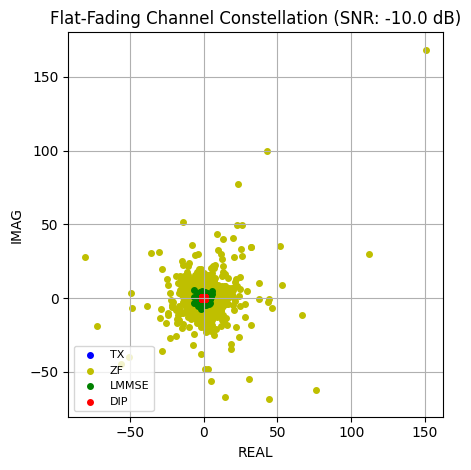

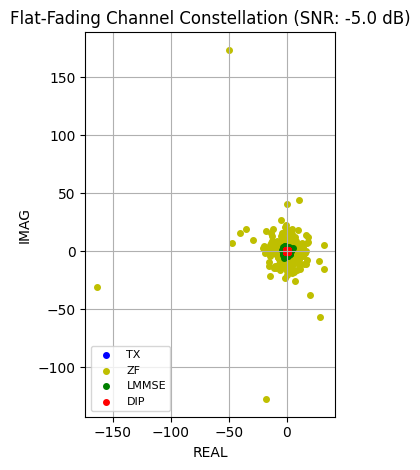

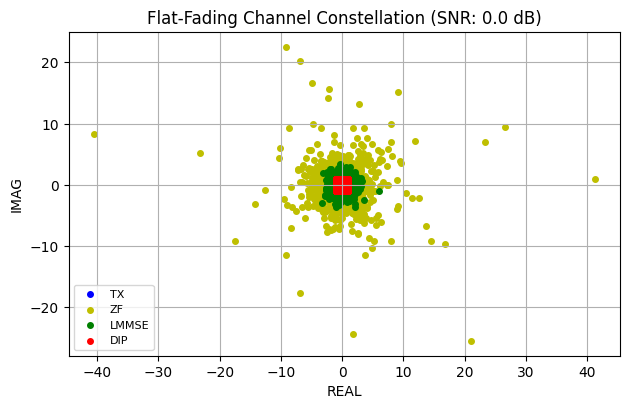

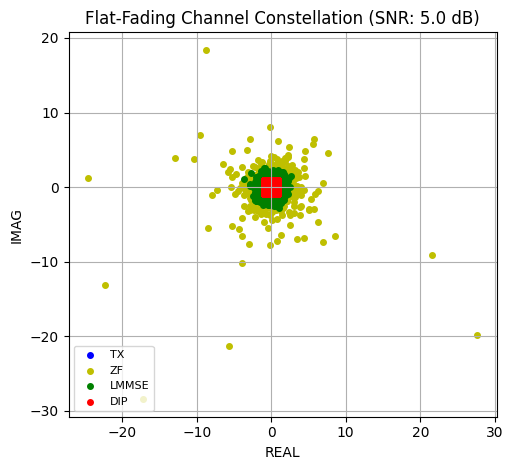

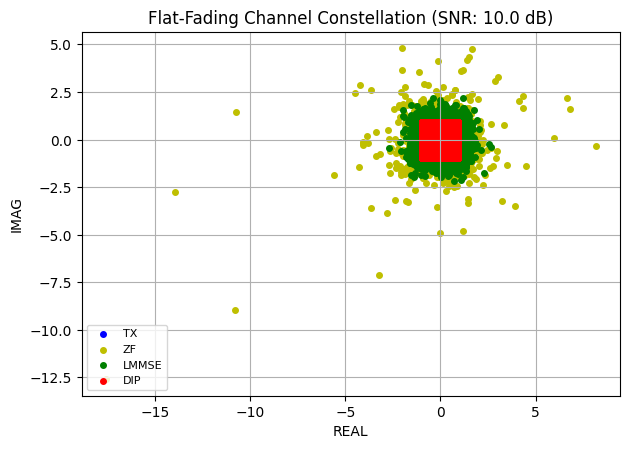

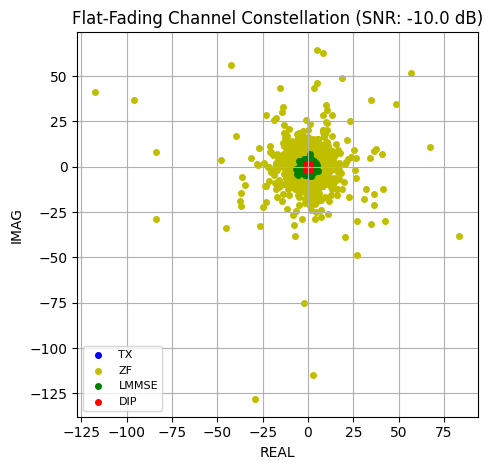

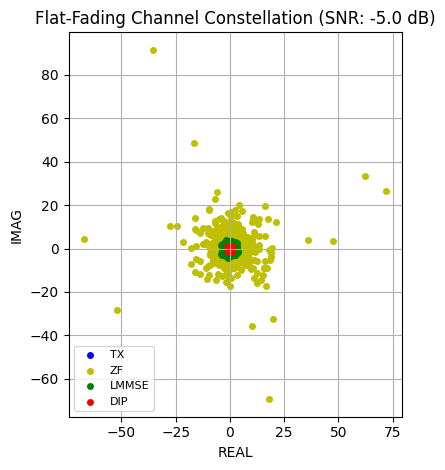

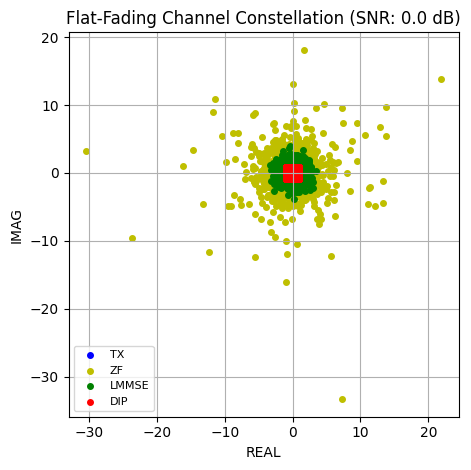

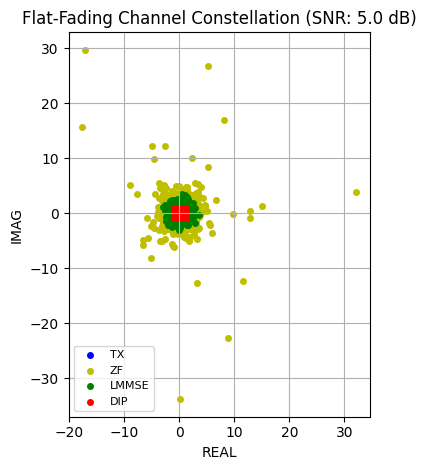

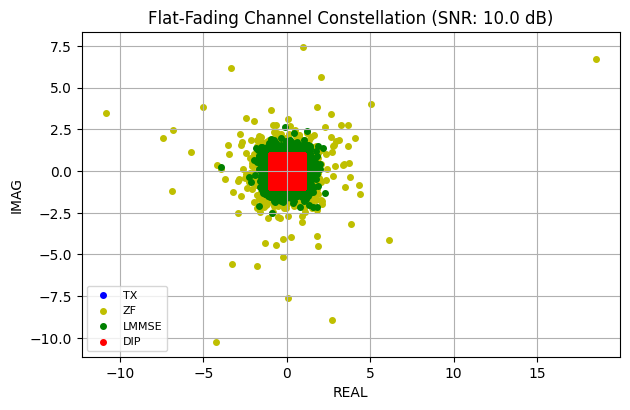

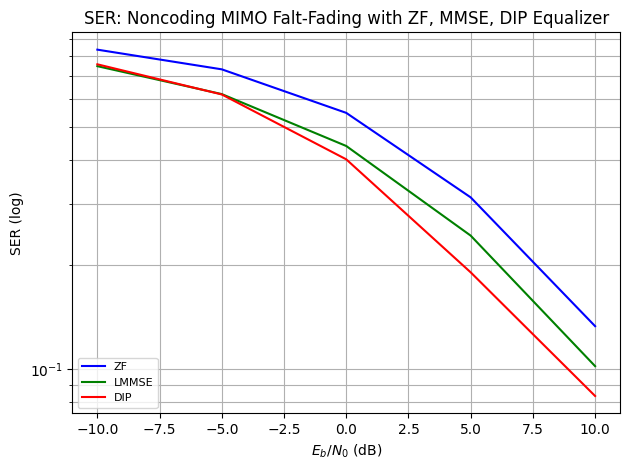

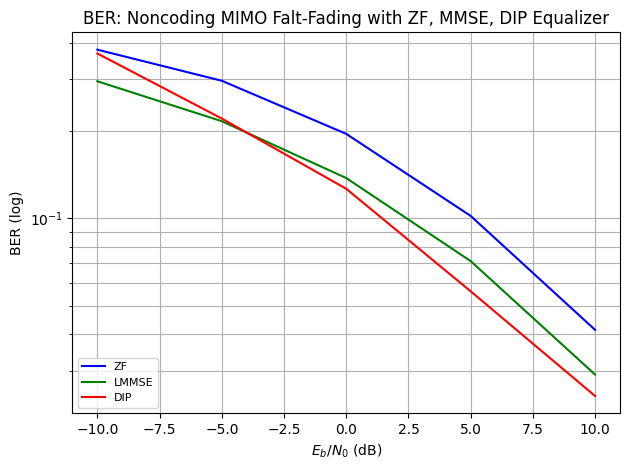

Loading BokehJS ...

Loading BokehJS ...

(array([-10.,  -5.,   0.,   5.,  10.]),
 array([0.83598022, 0.7333374 , 0.54891357, 0.31282349, 0.13276978]),
 array([0.74901123, 0.62194824, 0.44035645, 0.2425354 , 0.10175171]),
 array([0.75830078, 0.62044067, 0.40292969, 0.18997192, 0.08342285]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from UncodedSystemFlatFading import UncodedSystemFlatFading

Block_Length = 128         # Block Length (k)
NUM_BITS_PER_SYMBOL = 4    # Mapping: 16QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas
NUM_RX_ANT = 4             # Receive Antennas

NUM_DATA_GROUP = 10        # Number of Data Group
BATCH_SIZE = 128            # Number of Parallelly Processed Batches
EBN0_DB_MIN = -10.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 10.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5       # EBNO Points

model_uncoded_ff = UncodedSystemFlatFading(Block_Length, 
                                           NUM_BITS_PER_SYMBOL,
                                           CONSTELLATION_TYPE,
                                           DEMAPPING_METHOD,
                                           NUM_RX_ANT,
                                           NUM_TX_ANT)

model_uncoded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)